In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv(r"D:\DataScience\project\AmesHousing.csv")
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [3]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [5]:
df.isna().sum()

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

# Data Cleaning

In [33]:
# Fill missing values for numerical features with the median
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].median())

# Fill missing values for categorical features with the mode
categorical_features = df.select_dtypes(include=['object']).columns
df[categorical_features] = df[categorical_features].fillna(df[categorical_features].mode().iloc[0])

In [35]:
df.isna().sum()

Order             0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 82, dtype: int64

In [9]:
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,Grvl,IR1,Lvl,...,0,Ex,MnPrv,Shed,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,Grvl,Reg,Lvl,...,0,Ex,MnPrv,Shed,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,Grvl,IR1,Lvl,...,0,Ex,MnPrv,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,Grvl,Reg,Lvl,...,0,Ex,MnPrv,Shed,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,Grvl,IR1,Lvl,...,0,Ex,MnPrv,Shed,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,Grvl,IR1,Lvl,...,0,Ex,GdPrv,Shed,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,68.0,8885,Pave,Grvl,IR1,Low,...,0,Ex,MnPrv,Shed,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,Grvl,Reg,Lvl,...,0,Ex,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,Grvl,Reg,Lvl,...,0,Ex,MnPrv,Shed,0,4,2006,WD,Normal,170000


# Data visualization

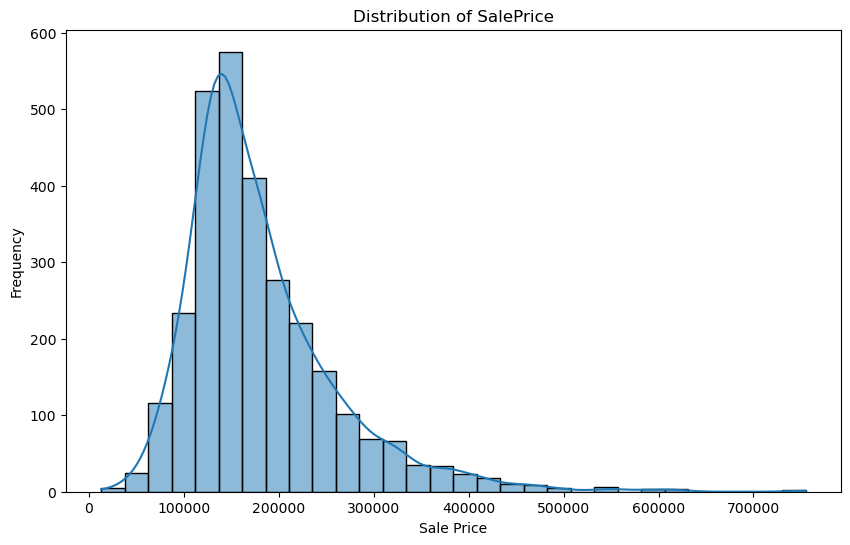

In [11]:
# Plot the distribution of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title('Distribution of SalePrice')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()


In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [41]:
# Encoding
for i in ('MS Zoning','Street','Alley','Lot Shape', 'Land Contour','Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1','Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl','Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Exter Qual','Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure','BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC','Central Air', 'Electrical', 'Kitchen Qual', 'Functional','Fireplace Qu', 'Garage Type', 'Garage Finish', 'Garage Qual','Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature','Sale Type', 'Sale Condition'):
    df[i] = le.fit_transform(df[i])

In [43]:
cor = df.corr()

<Axes: >

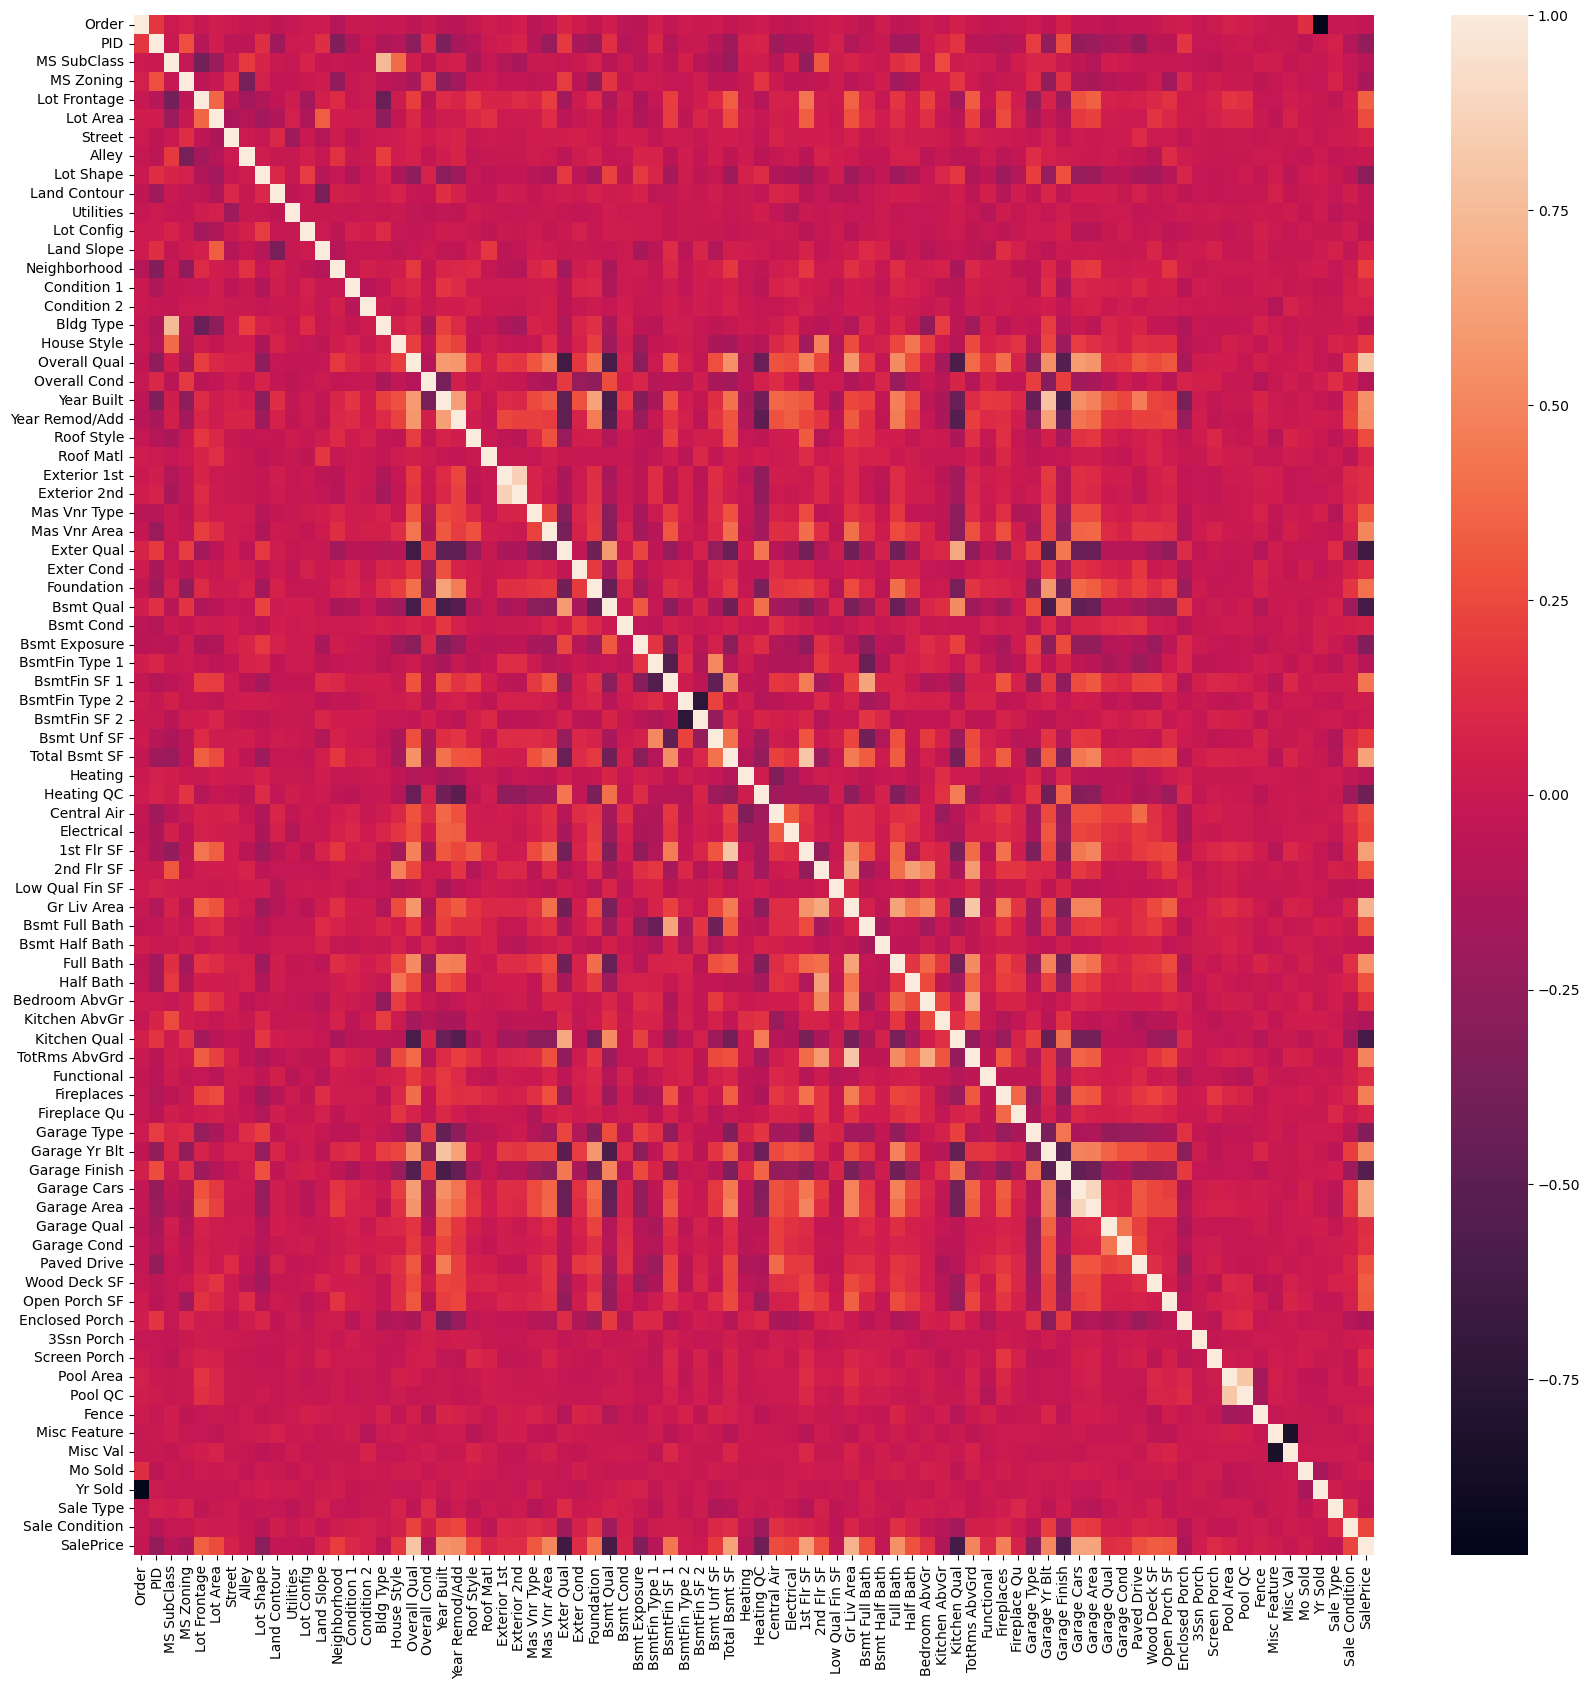

In [15]:
plt.figure(figsize = (20,20))
sns.heatmap(cor)

# feature engineerig

In [45]:
x = df.iloc[:,:-1]
x

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
0,1,526301100,20,5,141.0,31770,1,0,0,3,...,0,0,0,2,3,0,5,2010,9,4
1,2,526350040,20,4,80.0,11622,1,0,3,3,...,120,0,0,2,3,0,6,2010,9,4
2,3,526351010,20,5,81.0,14267,1,0,0,3,...,0,0,0,2,1,12500,6,2010,9,4
3,4,526353030,20,5,93.0,11160,1,0,3,3,...,0,0,0,2,3,0,4,2010,9,4
4,5,527105010,60,5,74.0,13830,1,0,0,3,...,0,0,0,2,3,0,3,2010,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,5,37.0,7937,1,0,0,3,...,0,0,0,0,3,0,3,2006,9,4
2926,2927,923276100,20,5,68.0,8885,1,0,0,2,...,0,0,0,2,3,0,6,2006,9,4
2927,2928,923400125,85,5,62.0,10441,1,0,3,3,...,0,0,0,2,3,700,7,2006,9,4
2928,2929,924100070,20,5,77.0,10010,1,0,3,3,...,0,0,0,2,3,0,4,2006,9,4


In [47]:
y = df.iloc[:,-1]
y

0       215000
1       105000
2       172000
3       244000
4       189900
         ...  
2925    142500
2926    131000
2927    132000
2928    170000
2929    188000
Name: SalePrice, Length: 2930, dtype: int64

# Standardization

In [220]:
ss = StandardScaler()
x_scaled = ss.fit_transform(x)

## Split data into train and test

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

# Model Training

## 1.Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#### Model Training

In [53]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

#### Predict the value

In [55]:
y_pred = model.predict(x_test)
y_pred


array([179721.47988448, 118186.43988238, 227266.04707006, 108623.25818194,
       112437.00267362, 200464.36645316, 169281.222687  , 139940.48727548,
       107664.31769353, 336495.1848636 , 246202.32616461, 244499.98465372,
        63192.77637507, 131690.83593416,  82011.37274344, 177841.87975623,
       141925.10942618, 220158.51849723, 111719.82220255, 140104.26849242,
       175889.60317762, 109947.01980852, 186841.20027446, 212017.06100094,
       202650.95241156, 304985.3624503 , 347365.88851851, 227401.98823637,
       208742.6540973 , 223763.18027468, 196944.65957857,  80052.00164751,
       233139.10053571,  89798.11641985, 147730.18204835,  63748.68764739,
       209824.01660756, 312220.63185904, 187957.02631057, 275952.94047149,
       314664.86305997, 228444.45116448, 229038.04629947, 200118.77680967,
       108601.84430287, 308233.29917469, 183390.37308154, 154378.12267173,
       150779.84518765, 141643.64791983, 196744.23824573, 132149.71053851,
       142830.97642766, 1

#### Evaluate the model

In [57]:
r2 = r2_score(y_test,y_pred)
print(r2)
linear_acc = r2

0.8611771819268446


## 2.Decision Tree Regression

In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [67]:
tr_model = DecisionTreeRegressor()
tr_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [74]:
y_pred = tr_model.predict(x_test)

In [78]:
tr_r2 = r2_score(y_test,y_pred)
print(tr_r2)

0.862060986178847


## 3.KNN

In [90]:
from sklearn.neighbors import KNeighborsRegressor

In [100]:
k =3
k_model = KNeighborsRegressor(n_neighbors=k)
k_model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [102]:
y_pred = k_model.predict(x_test)

In [104]:
k_r2 = r2_score(y_test,y_pred)
print(k_r2)

0.7834665158098868
